In your project you have been working with a bias dataset. Most probabely suupervised models were underfit. You should remember that this is a real dataset, and in real life most of the time you dont have access to clean and unbias dataset. In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. In the first part of this take-home exam, you are asked to be creative, and find a solution for this problem. 

For this dataset, you can break the problem, into a two-step machine learning model. 

First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification. You should remember that when you are dealing with biased datasets, accuracy is not a reliable scoring metric. So look for a robust scoring function. 

Next, you need to build a regression model to postprocess classification results. Here is a flow chart to show you the outline of the model. 

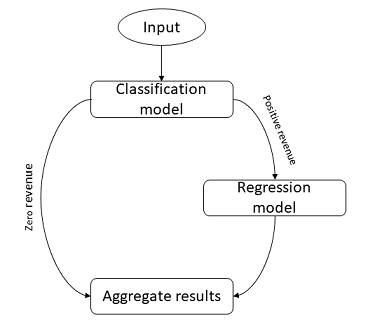

# Classification
# Importing dataframe from previous exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('final_df.csv')

In [2]:
df.shape

(16335, 62)

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16335 entries, 0 to 16334
Data columns (total 61 columns):
isMobile                                 16335 non-null int64
hasSocialSourceReferral                  16335 non-null float64
hitNumber                                16335 non-null int64
localProductPrice                        16335 non-null float64
visitNumber                              16335 non-null int64
totals_hits                              16335 non-null int64
totals_pageviews                         16335 non-null float64
totals_sessionQualityDim                 16335 non-null float64
totals_timeOnSite                        16335 non-null float64
totals_transactionRevenue                16335 non-null float64
totals_visits                            16335 non-null int64
channelGrouping_Affiliates               16335 non-null int64
channelGrouping_Direct                   16335 non-null int64
channelGrouping_Display                  16335 non-null int64
channelGrou

In [5]:
df.head()

,isMobile,hasSocialSourceReferral,hitNumber,localProductPrice,visitNumber,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,...,trafficSource_blog.golang.org,trafficSource_dfa,trafficSource_facebook,trafficSource_google,trafficSource_qiita.com,trafficSource_quora.com,trafficSource_reddit.com,trafficSource_siliconvalley.about.com,trafficSource_yahoo,trafficSource_youtube
0,0,0.0,1,14.240000,1,1,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0.0,2,17.790000,6,2,2.0,2.0,28.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1,0.0,2,19.418571,1,2,2.0,1.0,38.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,2,20.262727,1,2,2.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.0,2,0.000000,1,2,2.0,1.0,52.0,0.0,...,0,0,0,1,0,0,0,0,0,0


# Splitting X and y columns

In [6]:
X = df.drop('totals_transactionRevenue',axis=1)
y = df['totals_transactionRevenue']

In [7]:
print('X:',X.shape,'\tY:',y.shape)

X: (16335, 60) 	Y: (16335,)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16335 entries, 0 to 16334
Data columns (total 60 columns):
isMobile                                 16335 non-null int64
hasSocialSourceReferral                  16335 non-null float64
hitNumber                                16335 non-null int64
localProductPrice                        16335 non-null float64
visitNumber                              16335 non-null int64
totals_hits                              16335 non-null int64
totals_pageviews                         16335 non-null float64
totals_sessionQualityDim                 16335 non-null float64
totals_timeOnSite                        16335 non-null float64
totals_visits                            16335 non-null int64
channelGrouping_Affiliates               16335 non-null int64
channelGrouping_Direct                   16335 non-null int64
channelGrouping_Display                  16335 non-null int64
channelGrouping_Organic Search           16335 non-null int64
channelGroupi

# Converting y to: 1 for any value > 0, 0 for 0

In [9]:
y_clf = y.apply(lambda x: 1 if x>0 else 0)

In [10]:
from sklearn.model_selection import train_test_split
X_clf_train_org,X_clf_test_org,y_clf_train,y_clf_test = train_test_split(X,y_clf,random_state=3)

# Scaling data using MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mmsc = MinMaxScaler()
X_clf_train = mmsc.fit_transform(X_clf_train_org)
X_clf_test = mmsc.transform(X_clf_test_org)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Using classification as a first step in revenue prediction

## Logistic Regression (Using recall as the evaluation metrics)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logistic = GridSearchCV(LogisticRegression(),param_grid=params,cv=5,scoring='recall')

In [42]:
grid_logistic.fit(X_clf_train,y_clf_train)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\achin\appdata\local\programs\python\python36\lib\si

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [43]:
from sklearn.metrics import precision_score,confusion_matrix,precision_recall_curve

In [44]:
X_scaled = mmsc.transform(X)
ylogistic_clf_pred = grid_logistic.predict(X_scaled)

In [45]:
columns=['Best CV Recall Score','Best Params','Recall Score on train set','Recall Score on test set','Recall score on full data']

In [46]:
logistic_scores=[[grid_logistic.best_score_,[(grid_logistic.best_params_.keys(),grid_logistic.best_params_.values())],grid_logistic.score(X_clf_train,y_clf_train),grid_logistic.score(X_clf_test,y_clf_test),precision_score(y_clf,ylogistic_clf_pred)]]
pd.DataFrame(logistic_scores,columns=columns)

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
0,0.117724,"[((C), (1000))]",0.132353,0.111111,0.436364


In [47]:
print(confusion_matrix(y_clf,ylogistic_clf_pred))

[[16114    31]
 [  166    24]]


## KNN classification

In [48]:
from sklearn.neighbors import KNeighborsClassifier        

In [49]:
params = {'n_neighbors':np.arange(19,26,2)}

In [52]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,return_train_score=True,scoring='recall')

In [53]:
grid_knn.fit(X_clf_train,y_clf_train)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([19, 21, 23, 25])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [54]:
yknn_clf_pred= grid_knn.predict(X_scaled)

In [55]:
knn_scores=[[grid_knn.best_score_,[(grid_knn.best_params_.keys(),grid_knn.best_params_.values())],grid_knn.score(X_clf_train,y_clf_train),grid_knn.score(X_clf_test,y_clf_test),precision_score(y_clf,yknn_clf_pred)]]
pd.DataFrame(knn_scores,columns=columns)

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
0,0.117712,"[((n_neighbors), (19))]",0.176471,0.092593,0.537037


In [56]:
print(confusion_matrix(y_clf,yknn_clf_pred))

[[16120    25]
 [  161    29]]


# SVM Classification

In [57]:
from sklearn.svm import SVC

In [60]:
params = {'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_svc = GridSearchCV(SVC(),param_grid=params,return_train_score=True,scoring='recall')

In [61]:
grid_svc.fit(X_clf_train,y_clf_train)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [62]:
ysvc_clf_pred = grid_svc.predict(X_scaled)

In [63]:
svc_scores=[[grid_svc.best_score_,[(grid_svc.best_params_.keys(),grid_svc.best_params_.values())],grid_svc.score(X_clf_train,y_clf_train),grid_svc.score(X_clf_test,y_clf_test),precision_score(y_clf,ysvc_clf_pred)]]
pd.DataFrame(svc_scores,columns=columns)

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
0,0.154428,"[((C, gamma), (10, 10))]",0.441176,0.166667,0.69697


In [64]:
print(confusion_matrix(y_clf,ysvc_clf_pred))

[[16115    30]
 [  121    69]]


In [65]:
final_scores=pd.DataFrame(logistic_scores+knn_scores+svc_scores,columns=columns,index = ['Logistic Regression','KNN Classification','SVM Classification'])
final_scores

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
Logistic Regression,0.117724,"[((C), (1000))]",0.132353,0.111111,0.436364
KNN Classification,0.117712,"[((n_neighbors), (19))]",0.176471,0.092593,0.537037
SVM Classification,0.154428,"[((C, gamma), (10, 10))]",0.441176,0.166667,0.696970


# Using Ensemble of the above three classification models with their best parameters for better precision

In [66]:
from sklearn.ensemble import VotingClassifier
ens_logistic = LogisticRegression(C=1000)
ens_knn = KNeighborsClassifier(n_neighbors=19)
ens_svc = SVC(C=10,gamma=10)
voting_clf = VotingClassifier(estimators=[('logistic',ens_logistic),('knn',ens_knn),('svc',ens_svc)],voting = 'hard')

In [67]:
voting_clf.fit(X_clf_train,y_clf_train)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('logistic', LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [68]:
yensemble_clf_pred = voting_clf.predict(X_scaled)

In [69]:
voting_scores = [[np.nan,np.nan,precision_score(y_clf_train,voting_clf.predict(X_clf_train)),precision_score(y_clf_test,voting_clf.predict(X_clf_test)),precision_score(y_clf,yensemble_clf_pred)]]
pd.DataFrame(voting_scores,columns=columns)

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
0,NaN,NaN,0.714286,0.461538,0.654545


In [70]:
final_scores=pd.DataFrame(logistic_scores+knn_scores+svc_scores+voting_scores,columns=columns,index = ['Logistic Regression','KNN Classification','SVM Classification','Ensemble of the three'])
final_scores

,Best CV Recall Score,Best Params,Recall Score on train set,Recall Score on test set,Recall score on full data
Logistic Regression,0.117724,"[((C), (1000))]",0.132353,0.111111,0.436364
KNN Classification,0.117712,"[((n_neighbors), (19))]",0.176471,0.092593,0.537037
SVM Classification,0.154428,"[((C, gamma), (10, 10))]",0.441176,0.166667,0.696970
Ensemble of the three,NaN,NaN,0.714286,0.461538,0.654545


# Score from Ensemble is better than other models

In [71]:
df['pseudo_prediction']=yensemble_clf_pred

In [72]:
df.head()

,isMobile,hasSocialSourceReferral,hitNumber,localProductPrice,visitNumber,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,...,trafficSource_dfa,trafficSource_facebook,trafficSource_google,trafficSource_qiita.com,trafficSource_quora.com,trafficSource_reddit.com,trafficSource_siliconvalley.about.com,trafficSource_yahoo,trafficSource_youtube,pseudo_prediction
0,0,0.0,1,14.240000,1,1,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,2,17.790000,6,2,2.0,2.0,28.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1,0.0,2,19.418571,1,2,2.0,1.0,38.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,2,20.262727,1,2,2.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,2,0.000000,1,2,2.0,1.0,52.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
df_reg = df[df['pseudo_prediction']==1]

In [74]:
df_reg[['totals_transactionRevenue','pseudo_prediction']]

,totals_transactionRevenue,pseudo_prediction
648,9.12,1
3900,339.03,1
3905,0.00,1
3917,305.47,1
3930,90.85,1
3931,0.00,1
3933,0.00,1
3934,0.00,1
3936,0.00,1
3940,0.00,1


In [75]:
X_reg = df_reg.drop(columns=['pseudo_prediction','totals_transactionRevenue'])

In [76]:
X_reg.shape

(55, 60)

In [77]:
y_reg = df_reg['totals_transactionRevenue']

In [78]:
y_reg.shape

(55,)

# Using SVR to predict revenue where it was predicted to be 1 in the classification

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [90]:
Xtrain_reg,Xtest_reg,ytrain_reg,ytest_reg = train_test_split(X_reg,y_reg,random_state=3)
Xtrain_reg_scaled = sc.fit_transform(Xtrain_reg)
Xtest_reg_scaled = sc.transform(Xtest_reg)


c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
from sklearn.svm import SVR

In [92]:
params = {'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10],'kernel':['rbf','poly'],'degree':[2,3]}
grid_svr = GridSearchCV(SVR(),param_grid=params,cv=3,return_train_score=True)

In [93]:
grid_svr.fit(Xtrain_reg_scaled,ytrain_reg)

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'poly'], 'degree': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
y_reg_pred = grid_svr.predict(sc.transform(X_reg))

c:\users\achin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [95]:
X_reg['revenue_pred'] = y_reg_pred

In [96]:
X_reg['revenue_pred']

648         9.219715
3900       44.533354
3905        8.586668
3917       61.830807
3930       55.294123
3931        5.877558
3933       43.309342
3934       29.544528
3936       28.432140
3940       47.904174
3942       34.739447
3944       53.337771
3947       47.505054
3949       67.587887
8015       62.024714
8018       30.489802
8019      114.145137
8024       58.843025
8026       44.701922
8028        0.099979
8031       52.156310
8037      105.019855
8038        4.551307
8039     1076.899620
10671      46.271728
10673      38.311422
10678       0.099848
10680      17.287582
10683      34.084302
10686      17.852238
10687      33.270389
10692      57.619508
10693      33.469175
10697     114.325911
11884      20.618921
11886      15.013929
11898      41.965700
11905      38.060433
11906      21.488472
11907      -0.100205
12364      48.005035
12768     305.390435
12785       8.862468
12790     100.729204
12791      39.614157
12792      42.245023
12795      45.389815
12796      52

In [97]:
orgvspred = df.join(X_reg['revenue_pred']).fillna(0)[['totals_transactionRevenue','revenue_pred']]

In [98]:
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [99]:
score=[]
for metrics in [mean_absolute_error,mean_squared_error]:
    score.append([str(metrics).split()[1],metrics(orgvspred.iloc[:,0],orgvspred.iloc[:,1])])


In [100]:
print(score[0],score[1])

['mean_absolute_error', 1.268044471672293] ['mean_squared_error', 825.0314260574544]


# The mean absolute error is not bad. The prediction results are better than the previous exercise